In [1]:
# mount to drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

MessageError: ignored

In [256]:
!ls /content/drive/MyDrive/YELP/yelp_dataset/

PATH_OF_DATA='/content/drive/MyDrive/YELP/yelp_dataset/'

1_5  Dataset_User_Agreement.pdf		  yelp_academic_dataset_review.json
2_5  test_CziOtnFSklimJnBgksDDwA.json	  yelp_academic_dataset_tip.json
3_5  yelp_academic_dataset_business.json  yelp_academic_dataset_user.json
4_5  yelp_academic_dataset_checkin.json


In [257]:
import json

# Opening JSON file
star_level = '2_5'
json_root = PATH_OF_DATA + star_level + '/review.json'
f = open(json_root)
reviews = json.load(f)

json_root = PATH_OF_DATA + star_level + '/info.json'
f = open(json_root)
info = json.load(f)

print(len(reviews))
print(type(reviews[0]))
print(info)

1292
<class 'dict'>
{'business_id': 'rSYyGcZZziJLsqKl5hMcDw', 'name': 'Circus Circus Reno', 'address': '500 N Sierra St', 'city': 'Reno', 'state': 'NV', 'postal_code': '89503', 'latitude': 39.5322014, 'longitude': -119.815363, 'stars': 2.5, 'review_count': 1249, 'is_open': 1, 'attributes': {'RestaurantsGoodForGroups': 'True', 'BusinessAcceptsCreditCards': 'True', 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}", 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': "'casual'", 'WiFi': "u'free'", 'BusinessParking': "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}", 'GoodForKids': 'True', 'HasTV': 'True', 'Alcohol': "'full_bar'", 'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'RestaurantsPriceRange2': '2', 'BYOBCorkage': "'no'", 'NoiseLevel': "u'loud'", 'Smoking': "u'yes'", 'DogsAllowed': 'False', 'GoodForMeal': "{'dess

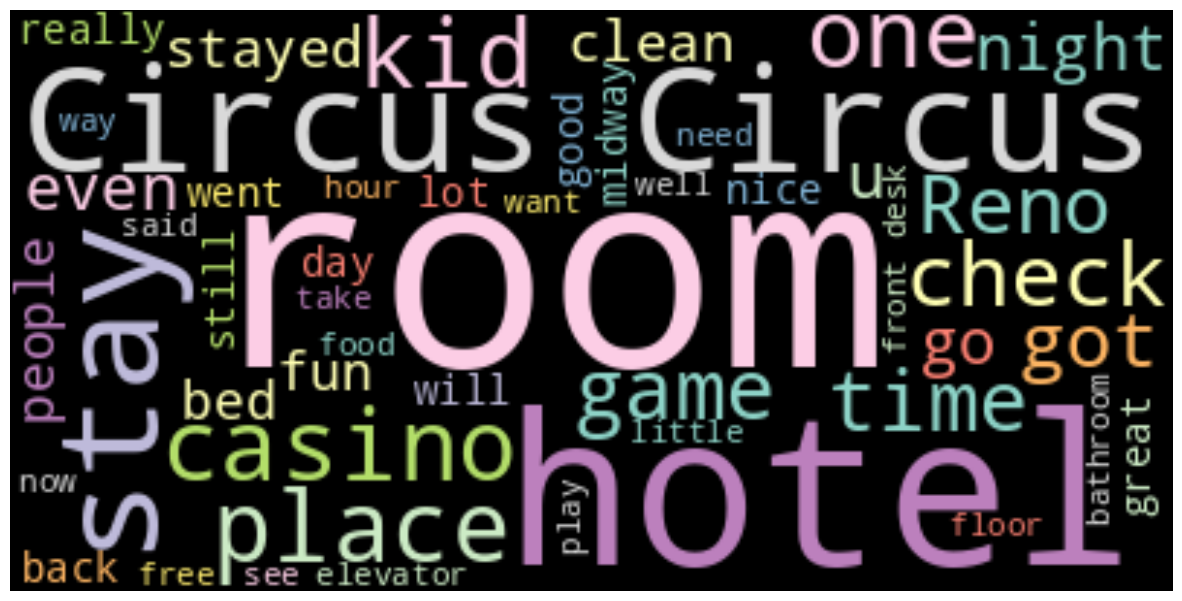

<Figure size 1000x600 with 0 Axes>

dict_keys(['room', 'hotel', 'Circus Circus', 'stay', 'casino', 'place', 'kid', 'one', 'check', 'time', 'game', 'Reno', 'got', 'night', 'go', 'even', 'u', 'stayed', 'clean', 'fun', 'people', 'bed', 'really', 'will', 'good', 'great', 'still', 'nice', 'midway', 'day', 'back', 'lot', 'went', 'elevator', 'take', 'hour', 'food', 'way', 'little', 'well', 'floor', 'front desk', 'need', 'want', 'said', 'free', 'bathroom', 'see', 'now', 'play'])


In [258]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator


review_text = []
for review in reviews:
  review_text.append(review['text'])

text = " ".join(str(each) for each in review_text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

print(wordcloud.words_.keys())

869


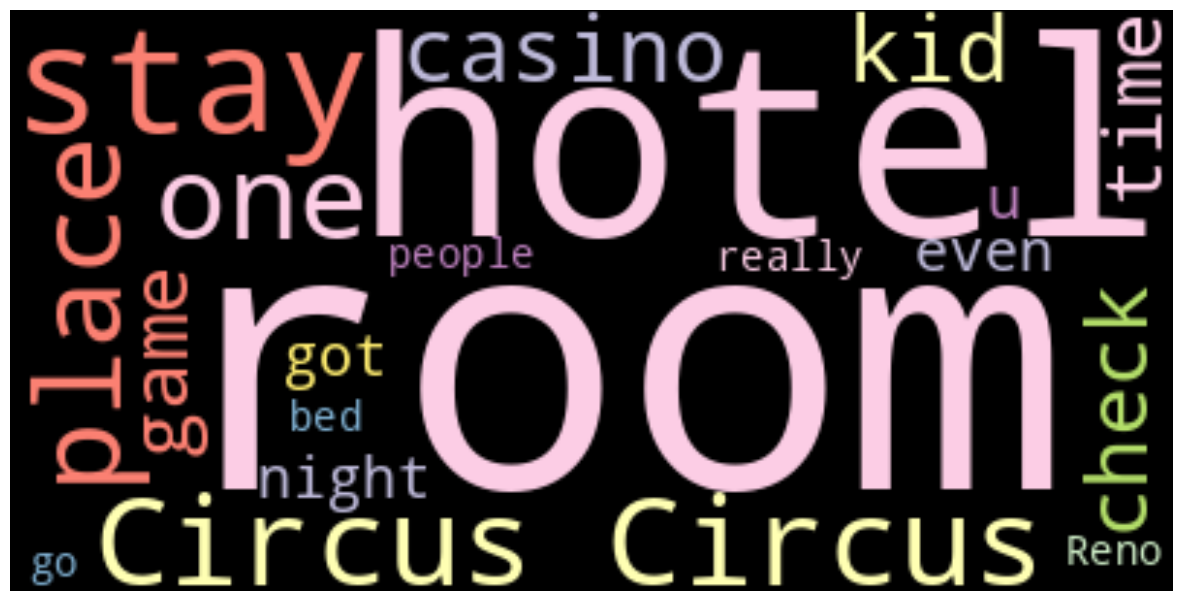

<Figure size 1000x600 with 0 Axes>

dict_keys(['room', 'hotel', 'stay', 'Circus Circus', 'place', 'one', 'casino', 'kid', 'check', 'time', 'game', 'night', 'even', 'u', 'got', 'people', 'Reno', 'go', 'bed', 'really'])


In [259]:
worst_review = []
Threshold = 3.0
for review in reviews:
  if review['stars'] <= Threshold:
    worst_review.append(review['text'])

print(len(worst_review))


text = " ".join(str(each) for each in worst_review)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=20,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

print(wordcloud.words_.keys())

In [260]:
top_15 = {}

count = 0
for key in wordcloud.words_.keys():
  # each review contains 3 element, first is total star, second is review count and third is the average star
  top_15[key] = [0,0,0]
  count+= 1
  if count >15: break

print(top_15)

top_15_star = top_15.copy()
top_15_sent = top_15.copy()


{'room': [0, 0, 0], 'hotel': [0, 0, 0], 'stay': [0, 0, 0], 'Circus Circus': [0, 0, 0], 'place': [0, 0, 0], 'one': [0, 0, 0], 'casino': [0, 0, 0], 'kid': [0, 0, 0], 'check': [0, 0, 0], 'time': [0, 0, 0], 'game': [0, 0, 0], 'night': [0, 0, 0], 'even': [0, 0, 0], 'u': [0, 0, 0], 'got': [0, 0, 0], 'people': [0, 0, 0]}


In [261]:
for review in reviews:
  for key in top_15_star.keys():
    if key in review['text']:
      top_15_star[key][0] += review['stars']
      top_15_star[key][1] += 1

for key in top_15_star.keys():
  top_15_star[key][2] = round(top_15_star[key][0]/top_15_star[key][1],2)

print(top_15_star)

{'room': [2071.0, 792, 2.61], 'hotel': [1385.0, 524, 2.64], 'stay': [1600.0, 608, 2.63], 'Circus Circus': [1014.0, 358, 2.83], 'place': [1226.0, 432, 2.84], 'one': [1683.0, 653, 2.58], 'casino': [1038.0, 359, 2.89], 'kid': [1127.0, 380, 2.97], 'check': [816.0, 343, 2.38], 'time': [1252.0, 449, 2.79], 'game': [1090.0, 350, 3.11], 'night': [922.0, 362, 2.55], 'even': [674.0, 284, 2.37], 'u': [3491.0, 1279, 2.73], 'got': [697.0, 262, 2.66], 'people': [516.0, 213, 2.42]}


[2.61, 2.64, 2.63, 2.83, 2.84, 2.58, 2.89, 2.97, 2.38, 2.79, 3.11, 2.55, 2.37, 2.73, 2.66, 2.42]


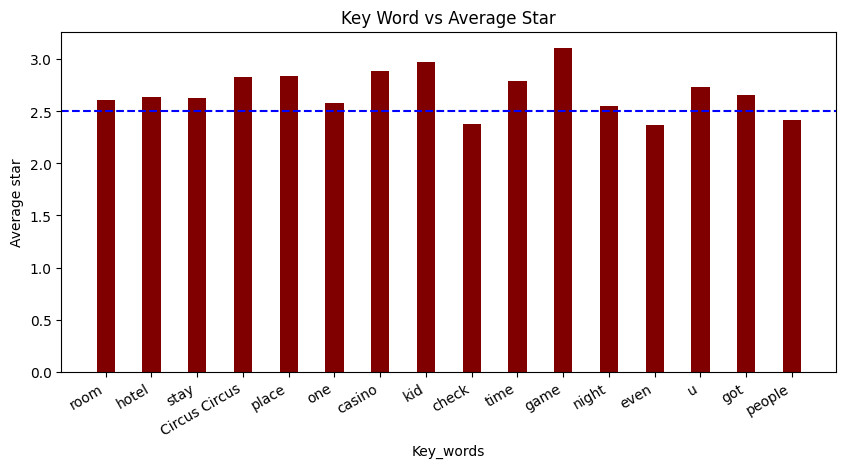

In [262]:
key_word = list(top_15_star.keys())
star_all = list(top_15_star.values())
star = []

for st in star_all:
  star.append(st[2])

print(star)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(key_word, star, color ='maroon',
        width = 0.4)
fig.autofmt_xdate()
plt.axhline(y = info['stars'], color = 'b', linestyle = '--')

plt.xlabel("Key_words")
plt.ylabel("Average star")
plt.title("Key Word vs Average Star")
plt.show()

In [263]:
pip install vaderSentiment

In [264]:
import nltk
nltk.download('punkt')

test_text = "The food is great, but the service is horroble. well it is ok"

nltk.sent_tokenize(test_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The food is great, but the service is horroble.', 'well it is ok']

In [265]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

test_text = "Ohhhhhhhhhhhh!"
score = sentiment.polarity_scores(test_text)
print(score)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [266]:


count = 0
for key in wordcloud.words_.keys():
  # each review contains 3 element, first is total star, second is review count and third is the average star
  top_15[key] = [0,0,0]
  count+= 1
  if count >15: break

# print(top_15)
top_15_sent = top_15.copy()
print(top_15_sent)
worst_reviews = []
sent_threshold = 0.0

for review in reviews:
  for key in top_15_sent.keys():
    # here we seperate the reviews into sentences to avoid good + bad reviews to be neutral for different topics
    sep_text = nltk.sent_tokenize(review['text'])
    # sep_text = review['text']
    for text in sep_text:
      if key in text:
        score = sentiment.polarity_scores(text)
        if score['compound']<sent_threshold:
          worst_reviews.append(text)
        # print(score['compound'])
        top_15_sent[key][0] += score['compound']
        top_15_sent[key][1] += 1

for key in top_15_sent.keys():
  if top_15_sent[key][1] != 0:
    top_15_sent[key][2] = round(top_15_sent[key][0]/top_15_sent[key][1],3)


# sent_1 = sentiment.polarity_scores(text_1)
print(top_15_sent)
print(len(worst_reviews))


{'room': [0, 0, 0], 'hotel': [0, 0, 0], 'stay': [0, 0, 0], 'Circus Circus': [0, 0, 0], 'place': [0, 0, 0], 'one': [0, 0, 0], 'casino': [0, 0, 0], 'kid': [0, 0, 0], 'check': [0, 0, 0], 'time': [0, 0, 0], 'game': [0, 0, 0], 'night': [0, 0, 0], 'even': [0, 0, 0], 'u': [0, 0, 0], 'got': [0, 0, 0], 'people': [0, 0, 0]}
{'room': [249.16270000000094, 1929, 0.129], 'hotel': [107.78469999999986, 881, 0.122], 'stay': [163.22859999999991, 1031, 0.158], 'Circus Circus': [94.56219999999996, 519, 0.182], 'place': [160.18059999999997, 641, 0.25], 'one': [153.55119999999994, 1133, 0.136], 'casino': [101.00949999999999, 527, 0.192], 'kid': [178.58, 568, 0.314], 'check': [48.62569999999995, 520, 0.094], 'time': [125.6874999999999, 641, 0.196], 'game': [197.01100000000025, 555, 0.355], 'night': [70.47290000000004, 517, 0.136], 'even': [46.92869999999999, 385, 0.122], 'u': [1196.1343999999938, 8872, 0.135], 'got': [52.72399999999992, 373, 0.141], 'people': [23.556800000000003, 270, 0.087]}
4354


[0.129, 0.122, 0.158, 0.182, 0.25, 0.136, 0.192, 0.314, 0.094, 0.196, 0.355, 0.136, 0.122, 0.135, 0.141, 0.087]


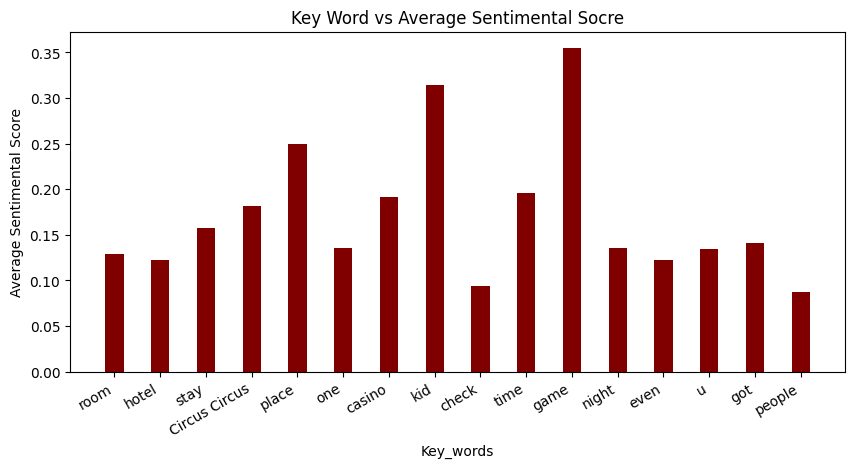

In [267]:
key_word = list(top_15.keys())
star_all = list(top_15.values())
star = []

for st in star_all:
  star.append(st[2])

print(star)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(key_word, star, color ='maroon',
        width = 0.4)
fig.autofmt_xdate()
# plt.axhline(y = 3.5, color = 'b', linestyle = '--')

plt.xlabel("Key_words")
plt.ylabel("Average Sentimental Score")
plt.title("Key Word vs Average Sentimental Socre")
plt.show()

Can do a great and terrible resturuant example to see the sentimental score of average topics. In this way we can get a sense of roughly an average sentimental score.

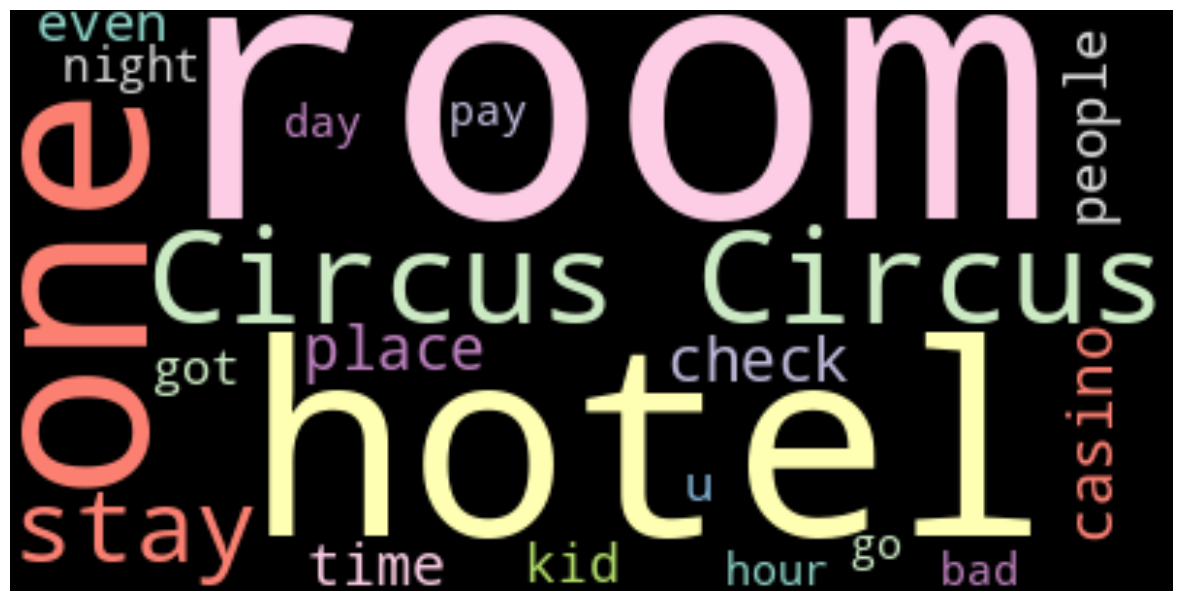

<Figure size 1000x600 with 0 Axes>

dict_keys(['room', 'hotel', 'one', 'Circus Circus', 'stay', 'place', 'casino', 'check', 'time', 'people', 'even', 'kid', 'got', 'u', 'night', 'go', 'day', 'pay', 'bad', 'hour'])


In [268]:
text = " ".join(str(each) for each in worst_reviews)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=20,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

print(wordcloud.words_.keys())